In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a))

    return d

In [56]:
df = pd.read_csv("housing.csv")

df['position'] = np.sqrt((df['longitude'] + df['latitude'])*(df['longitude'] + df['latitude']))
df['value'] = np.log(df['median_house_value'])

newdf = df[["value", "position", "median_income"]]

newdf = newdf.rename(columns = {'median_income':'income'})
newdf['harvesine'] = [single_pt_haversine(x, y) for x, y in zip(df.longitude, df.latitude)]

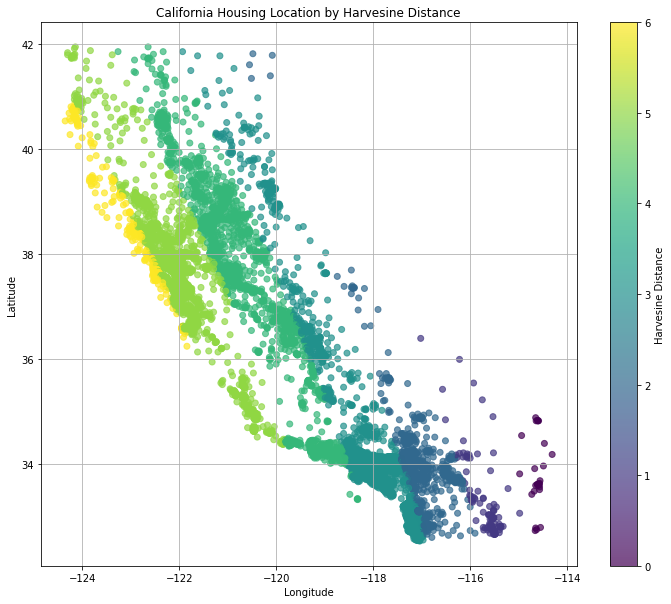

In [61]:
x = df['longitude']
y = df['latitude']
value = newdf['harvesine']

price_bins = [12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900]
color_idx = pd.cut(value, bins=price_bins, labels=range(len(price_bins) - 1))

plt.figure(figsize=(12, 10))
plt.scatter(x, y, c=color_idx, cmap='viridis', alpha=0.7)
plt.colorbar(label='Harvesine Distance')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Location by Harvesine Distance')
plt.grid(True)
plt.show()

In [62]:
newdf['position'].describe()

count    20640.000000
mean        83.937843
std          0.813833
min         78.290000
25%         83.550000
50%         84.180000
75%         84.420000
max         85.890000
Name: position, dtype: float64

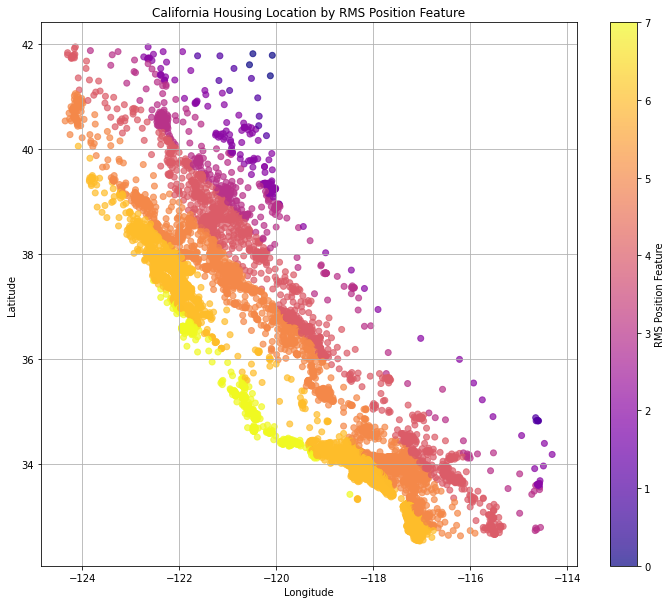

In [69]:
x = df['longitude']
y = df['latitude']
value = newdf['position']

price_bins = [78,79, 80,81, 82,83, 84,85, 86]
color_idx = pd.cut(value, bins=price_bins, labels=range(len(price_bins) - 1))

plt.figure(figsize=(12, 10))
plt.scatter(x, y, c=color_idx, cmap='plasma', alpha=0.7)
plt.colorbar(label='RMS Position Feature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Location by RMS Position Feature')
plt.grid(True)
plt.show()

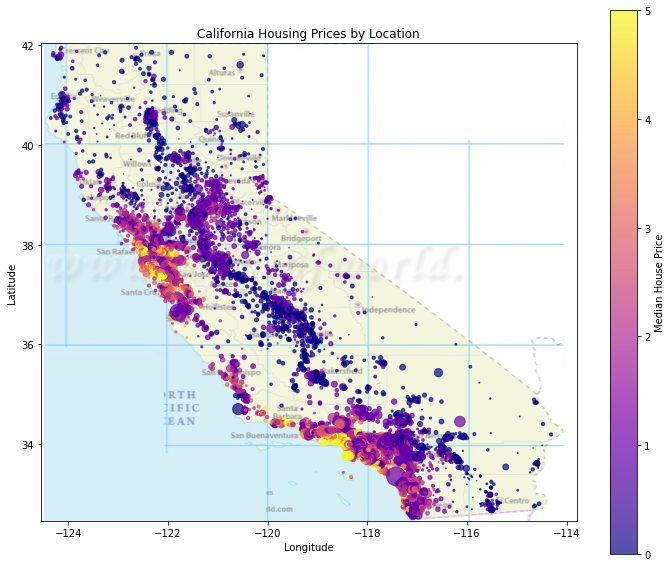

In [58]:
x = df['longitude']
y = df['latitude']
value = df['median_house_value']

california_img=mpimg.imread('californiamap.png')


price_bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, float('inf')]
color_idx = pd.cut(value, bins=price_bins, labels=range(len(price_bins) - 1))

plt.figure(figsize=(12, 10))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.scatter(x, y, s=housing_plot['population']/100, c=color_idx, cmap='plasma', alpha=0.7)
plt.colorbar(label='Median House Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices by Location')
plt.show()

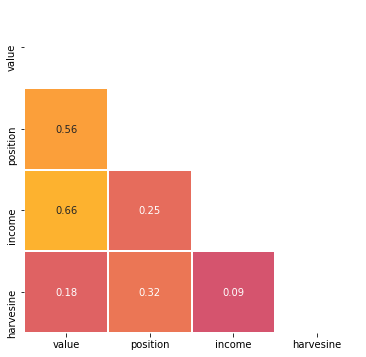

In [60]:
corr_mat = newdf.corr().round(2)
f, ax = plt.subplots(figsize=(6,6))
mask = np.zeros_like(corr_mat,dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0,
            cmap='plasma',square=False,lw=2,annot=True,cbar=False)
plt.show()